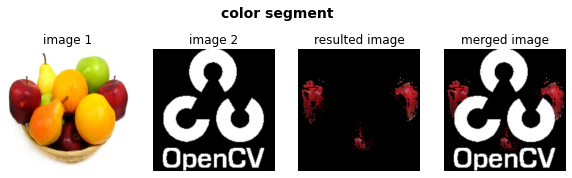

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_with_matplotlib(color_img, title, pos):
    img_RGB = color_img[:, :, ::-1]
    ax = plt.subplot(1, 4, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


def empty(a):
    pass


cv2.namedWindow("color segment")
cv2.createTrackbar("HUE Min", "color segment", 0, 180, empty)
cv2.createTrackbar("HUE Max", "color segment", 180, 180, empty)
cv2.createTrackbar("SAT Min", "color segment", 0, 255, empty)
cv2.createTrackbar("SAT Max", "color segment", 255, 255, empty)
cv2.createTrackbar("VALUE Min", "color segment", 0, 255, empty)
cv2.createTrackbar("VALUE Max", "color segment", 255, 255, empty)

image = cv2.imread("C:/Users/Mai_Allam/Desktop/opencv/assets/images/fruit.png")
image = cv2.resize(image, (250, 250))

while True:
    h_min = cv2.getTrackbarPos("HUE Min", "color segment")
    h_max = cv2.getTrackbarPos("HUE Max", "color segment")
    s_min = cv2.getTrackbarPos("SAT Min", "color segment")
    s_max = cv2.getTrackbarPos("SAT Max", "color segment")
    v_min = cv2.getTrackbarPos("VALUE Min", "color segment")
    v_max = cv2.getTrackbarPos("VALUE Max", "color segment")


    lower_range = np.array([h_min, s_min, v_min])
    upper_range = np.array([h_max, s_max, v_max])

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    Mask = cv2.inRange(hsv, lower_range, upper_range)
    bitwise = cv2.bitwise_or(image, image, mask=Mask)

    cv2.imshow("mask", Mask)
    cv2.imshow("original image", image)
    cv2.imshow("color segment", bitwise)

    k = cv2.waitKey(1)
    if k == ord('q') or k == ord('Q'):
    
        plt.figure(figsize=(10,3))
        plt.suptitle("color segment", fontsize=14, fontweight='bold')

        binary_image = cv2.imread('assets/images/opencv_binary.png')

        merged_img = cv2.bitwise_or(bitwise, binary_image)

        show_with_matplotlib(image, "image 1", 1)
        show_with_matplotlib(binary_image, "image 2", 2)
        show_with_matplotlib(bitwise, "resulted image", 3)
        show_with_matplotlib(merged_img, "merged image", 4)
        break
